In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection  import GridSearchCV
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [2]:
def notEmpty(s):
    return s != ''

In [3]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [4]:
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再按照每行数据进行处理
fd = pd.read_csv(path, header=None)
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):
    d = map(float, filter(notEmpty, d[0].split(' ')))
    data[i] = list(d)

x, y = np.split(data, (13,), axis=1)
y = y.ravel()

print ("样本数据量:%d, 特征个数：%d" % x.shape)
print ("target样本数据量:%d" % y.shape[0])

样本数据量:506, 特征个数：13
target样本数据量:506


In [5]:
#数据的分割，
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：404, 测试数据集样本数目：102


In [6]:
#标准化
ss = MinMaxScaler()

x_train = ss.fit_transform(x_train, y_train)
x_test = ss.transform(x_test)

print ("原始数据各个特征属性的调整最小值:",ss.min_)
print ("原始数据各个特征属性的缩放数据值:",ss.scale_)

原始数据各个特征属性的调整最小值: [ -7.10352762e-05   0.00000000e+00  -1.68621701e-02   0.00000000e+00
  -7.92181070e-01  -6.82314620e-01  -2.98661174e-02  -1.02719857e-01
  -4.34782609e-02  -3.56870229e-01  -1.34042553e+00  -6.38977636e-03
  -4.90780142e-02]
原始数据各个特征属性的缩放数据值: [  1.12397589e-02   1.00000000e-02   3.66568915e-02   1.00000000e+00
   2.05761317e+00   1.91607588e-01   1.02986612e-02   9.09347180e-02
   4.34782609e-02   1.90839695e-03   1.06382979e-01   2.53562554e-03
   2.83687943e-02]


In [7]:
#构建模型（回归）
model = DecisionTreeRegressor(criterion='mae',max_depth=5)
#模型训练
model.fit(x_train, y_train)
#模型预测
y_test_hat = model.predict(x_test) 

In [8]:
#评估模型
score = model.score(x_test, y_test)
print ("Score：", score)

Score： 0.790037989416


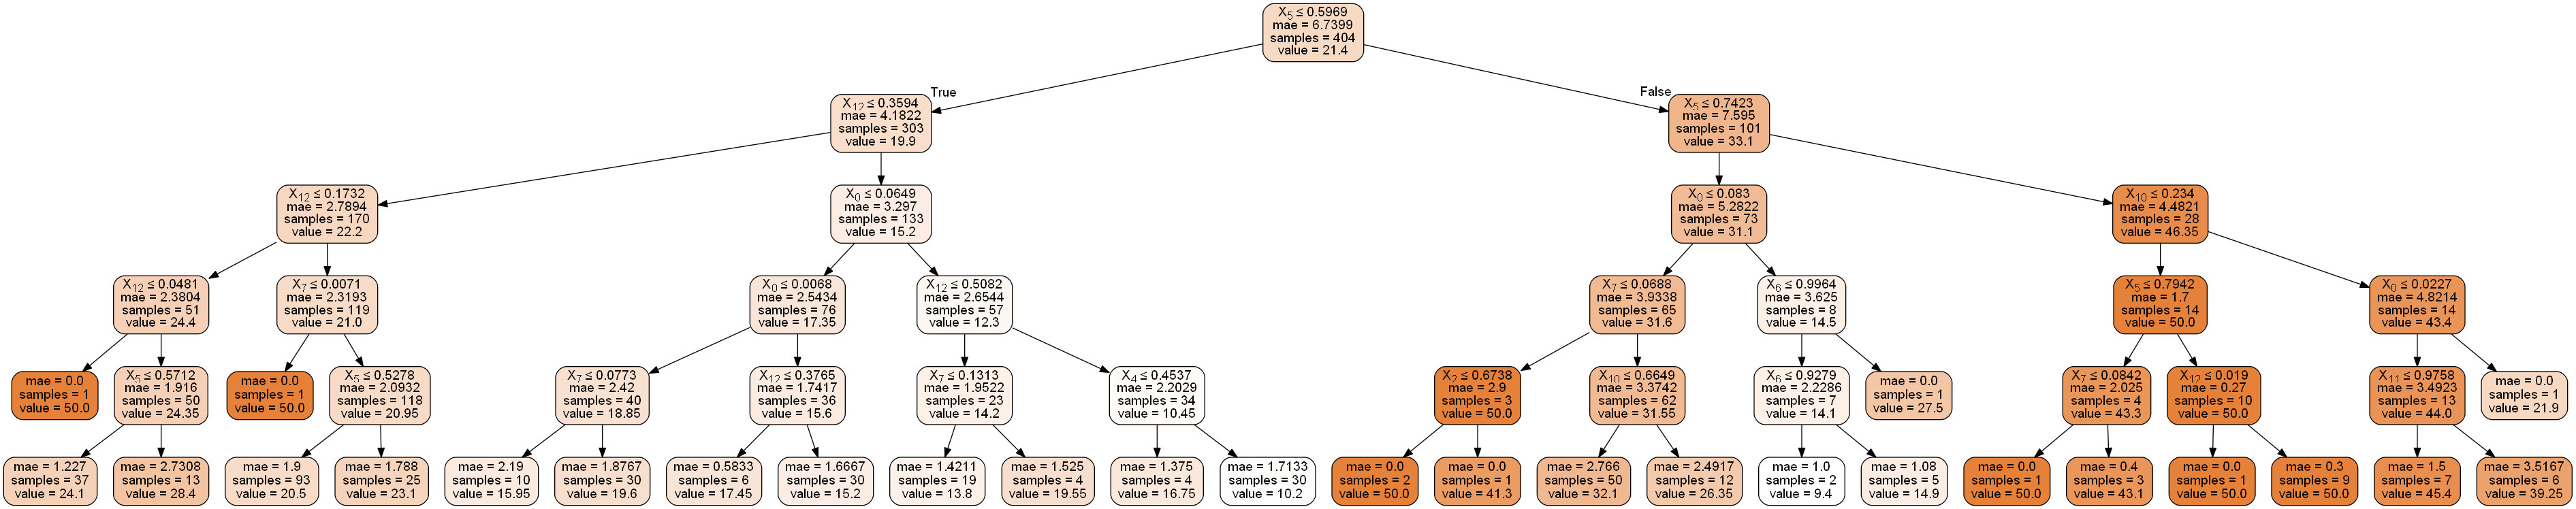

In [9]:
# 方式三：直接生成图片
from sklearn import tree
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(model, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())